Current Progress: 100.0 %
5.0
2.0
26.0
3.0
The old training dataframe shape: (2866, 8)
Total number of outliers identified is:  144
The new training dataframe shape: (2722, 8)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'bootstrap': False, 'max_features': 'log2', 'random_state': 1}
0.9230951958408374


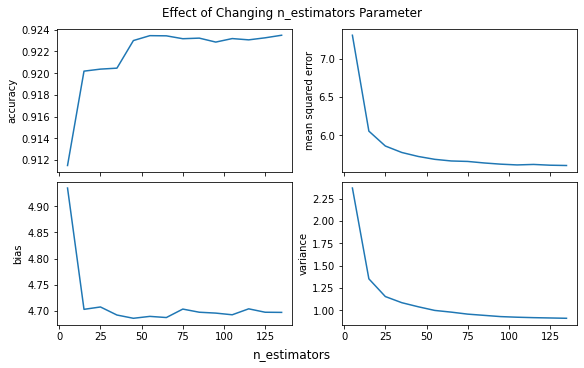

0.9223004275401402


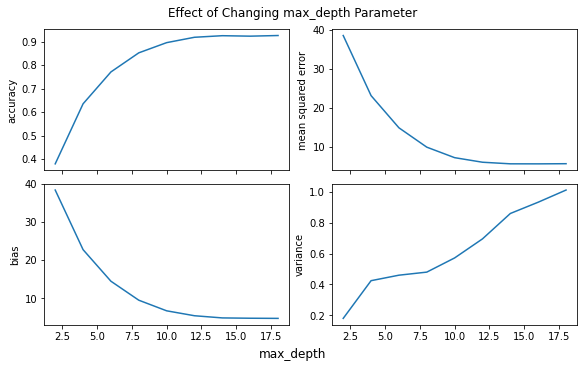

0.922839310764487


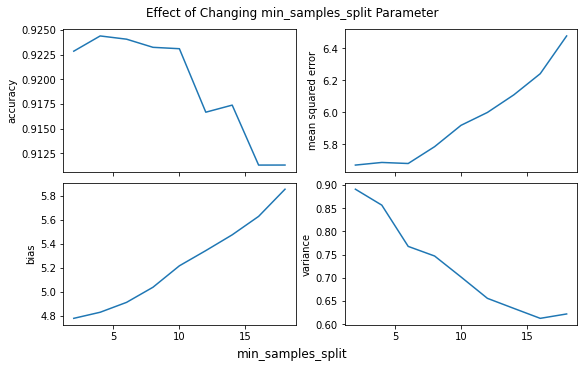

0.9259845959898451


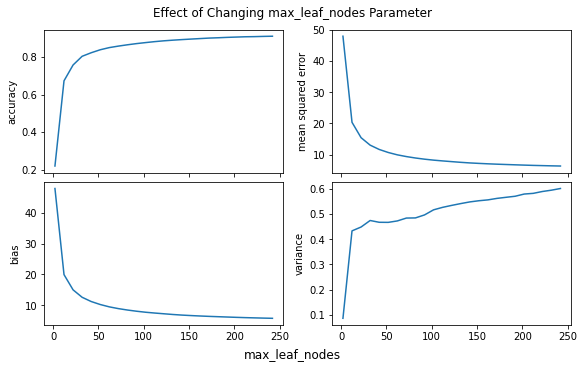

0.906173218098871
2.5983463636657755
6.073828324549433
0.6775755010257268


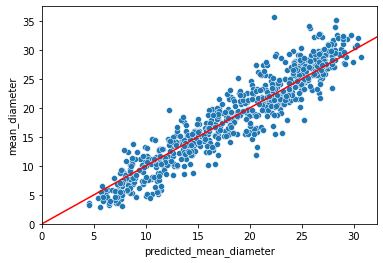

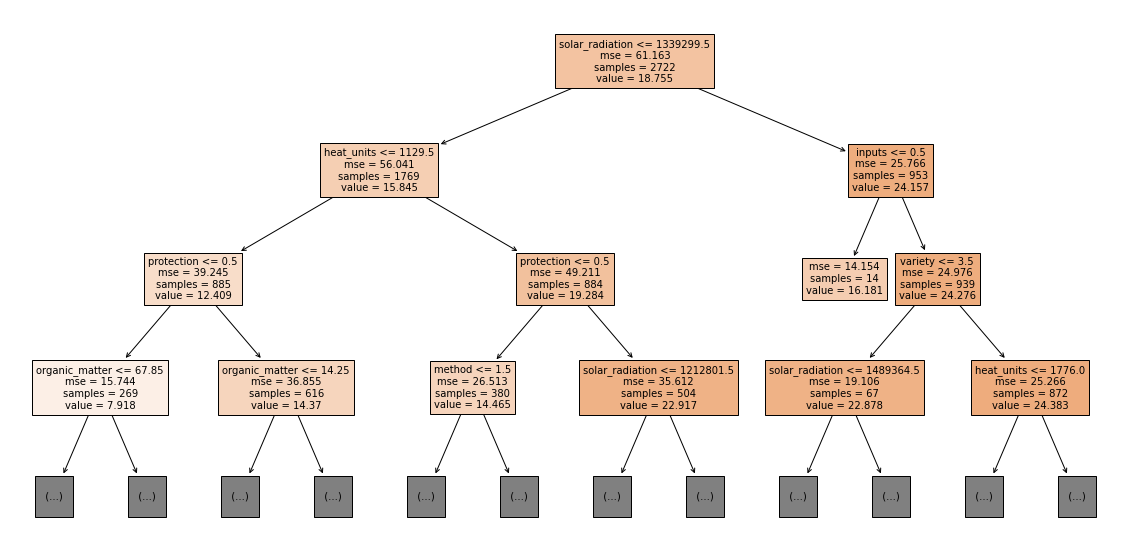

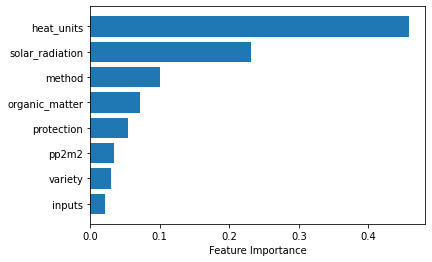

In [1]:
# Run preprocessing script to make dataframe objects available.

%run RFRegressionEval.ipynb

In [2]:
indicator_variables_list = ['pp2m2','heat_units','solar_radiation','organic_matter', 'method','variety','inputs','protection']

zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      837 non-null    object        
 1   zone                       837 non-null    int32         
 2   planting_date              837 non-null    datetime64[ns]
 3   variety                    837 non-null    object        
 4   method                     837 non-null    object        
 5   inputs                     837 non-null    object        
 6   protection                 837 non-null    object        
 7   planting_rate              837 non-null    int64         
 8   sand                       837 non-null    int64         
 9   silt                       837 non-null    int64         
 10  clay                       837 non-null    int64         
 11  organic_matter             837 non-null    float64       
 12  harvest_

In [3]:
planting_data = zone_data.copy()[['fieldvariety',
                                  'variety',
                                  'method',
                                  'inputs',
                                  'protection',
                                  'sand',
                                  'silt',
                                  'clay',
                                  'organic_matter',
                                  'mean_pp2m2',
                                  'max_heat',
                                  'max_solar',
                                  'remaining_heat',
                                  'remaining_solar',
                                  ]].loc[(zone_data['planting_date'] > season)]

planting_data['heat_units'] = planting_data['max_heat'] + planting_data['remaining_heat']
planting_data['solar_radiation'] = planting_data['max_solar'] + planting_data['remaining_solar']

planting_data = planting_data.groupby(['fieldvariety']).agg({'method' : ['first'],
                                                             'inputs' : ['first'],
                                                             'variety' : ['first'],
                                                             'protection' : ['first'],
                                                             'sand' : ['mean'],
                                                             'silt' : ['mean'],
                                                             'clay' : ['mean'],
                                                             'organic_matter' : ['mean'],
                                                             'mean_pp2m2' : ['mean'],
                                                             'heat_units' : ['mean'],
                                                             'solar_radiation' : ['mean']}).reset_index()

planting_data.columns = ['fieldvariety',
                         'method',
                         'inputs',
                         'variety',
                         'protection',
                         'sand',
                         'silt',
                         'clay',
                         'organic_matter',
                         'pp2m2',
                         'heat_units',
                         'solar_radiation']



In [4]:
print(planting_data.shape)
planting_data

(82, 12)


,fieldvariety,method,inputs,variety,protection,sand,silt,clay,organic_matter,pp2m2,heat_units,solar_radiation
0,Allans 15 - Chiefton,Drilled,Conventional,Chiefton,Barley,45,47,8,20.0,40.0,2481.458021,1.694261e+06
1,Allans 23 - Chiefton,Drilled,Conventional,Chiefton,Barley,40,51,9,17.0,40.0,2494.372083,1.699833e+06
2,Allans Long Drove - Krypton,Plant Tape,Conventional,Krypton,None,40,45,15,20.0,40.0,1687.138021,1.125598e+06
3,Bridge Field - Chiefton,Modules,Organic,Chiefton,None,38,50,12,1.2,40.0,1813.729092,1.266702e+06
4,Buckenham Eelsfoot - Chiefton,Drilled,Conventional,Chiefton,Barley,66,30,4,10.0,40.0,2335.840476,1.607431e+06
5,Butcher 16 - Chiefton,Drilled,Conventional,Chiefton,Barley,65,31,4,5.0,40.0,2443.448497,1.637210e+06
6,Butcher 39 - Chiefton,Drilled,Conventional,Chiefton,Barley,57,37,6,5.0,40.0,2443.448497,1.637210e+06
7,Chatteris Farms 40 - Laston,Plant Tape,Conventional,Laston,None,36,56,8,10.0,40.0,1870.622083,1.017361e+06
8,Garretts Decoy 1 - Comanche,Drilled,Conventional,Comanche,Barley,85,13,2,81.0,40.0,1387.050223,1.309266e+06
9,Garretts Decoy 2 - Comanche,Drilled,Conventional,Comanche,Barley,83,16,1,80.0,40.0,1813.539807,1.545472e+06


In [5]:
indicator_data = planting_data.reindex(columns=indicator_variables_list)
                                      
indicator_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pp2m2            82 non-null     float64
 1   heat_units       82 non-null     float64
 2   solar_radiation  82 non-null     float64
 3   organic_matter   82 non-null     float64
 4   method           82 non-null     object 
 5   variety          82 non-null     object 
 6   inputs           82 non-null     object 
 7   protection       82 non-null     object 
dtypes: float64(4), object(4)
memory usage: 5.2+ KB


In [6]:
# Encode categoriccal variables that will be used as predictors

pd.options.mode.chained_assignment = None  # default='warn'

encoded_array = enc.transform(indicator_data[['method', 'variety', 'inputs', 'protection']])
indicator_data.loc[:, ['method', 'variety', 'inputs', 'protection']] = encoded_array.copy()

indicator_data.head()

,pp2m2,heat_units,solar_radiation,organic_matter,method,variety,inputs,protection
0,40.0,2481.458021,1.694261e+06,20.0,2.0,4.0,1.0,0.0
1,40.0,2494.372083,1.699833e+06,17.0,2.0,4.0,1.0,0.0
2,40.0,1687.138021,1.125598e+06,20.0,4.0,11.0,1.0,2.0
3,40.0,1813.729092,1.266702e+06,1.2,3.0,4.0,2.0,2.0
4,40.0,2335.840476,1.607431e+06,10.0,2.0,4.0,1.0,0.0


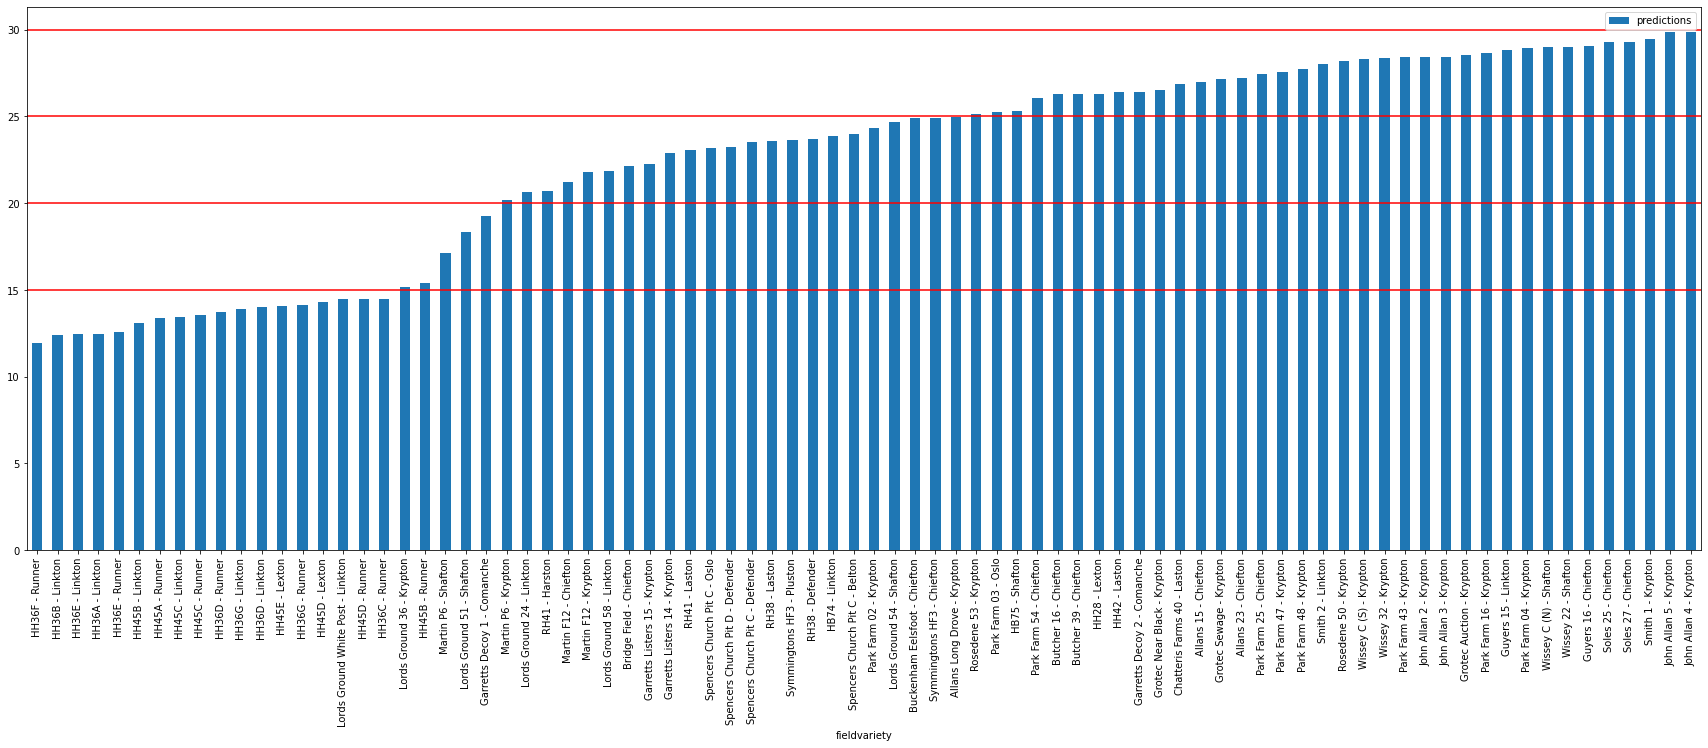

In [7]:
rfr_preds = rfr.predict(indicator_data)

planting_data['predictions'] = rfr_preds
planting_data= planting_data.sort_values(by=['predictions'])

planting_data.plot(x='fieldvariety', y='predictions', kind='bar', figsize=(30,10))
plt.axhline(y = 15, color = 'red')
plt.axhline(y = 20, color = 'red')
plt.axhline(y = 25, color = 'red')
plt.axhline(y = 30, color = 'red')

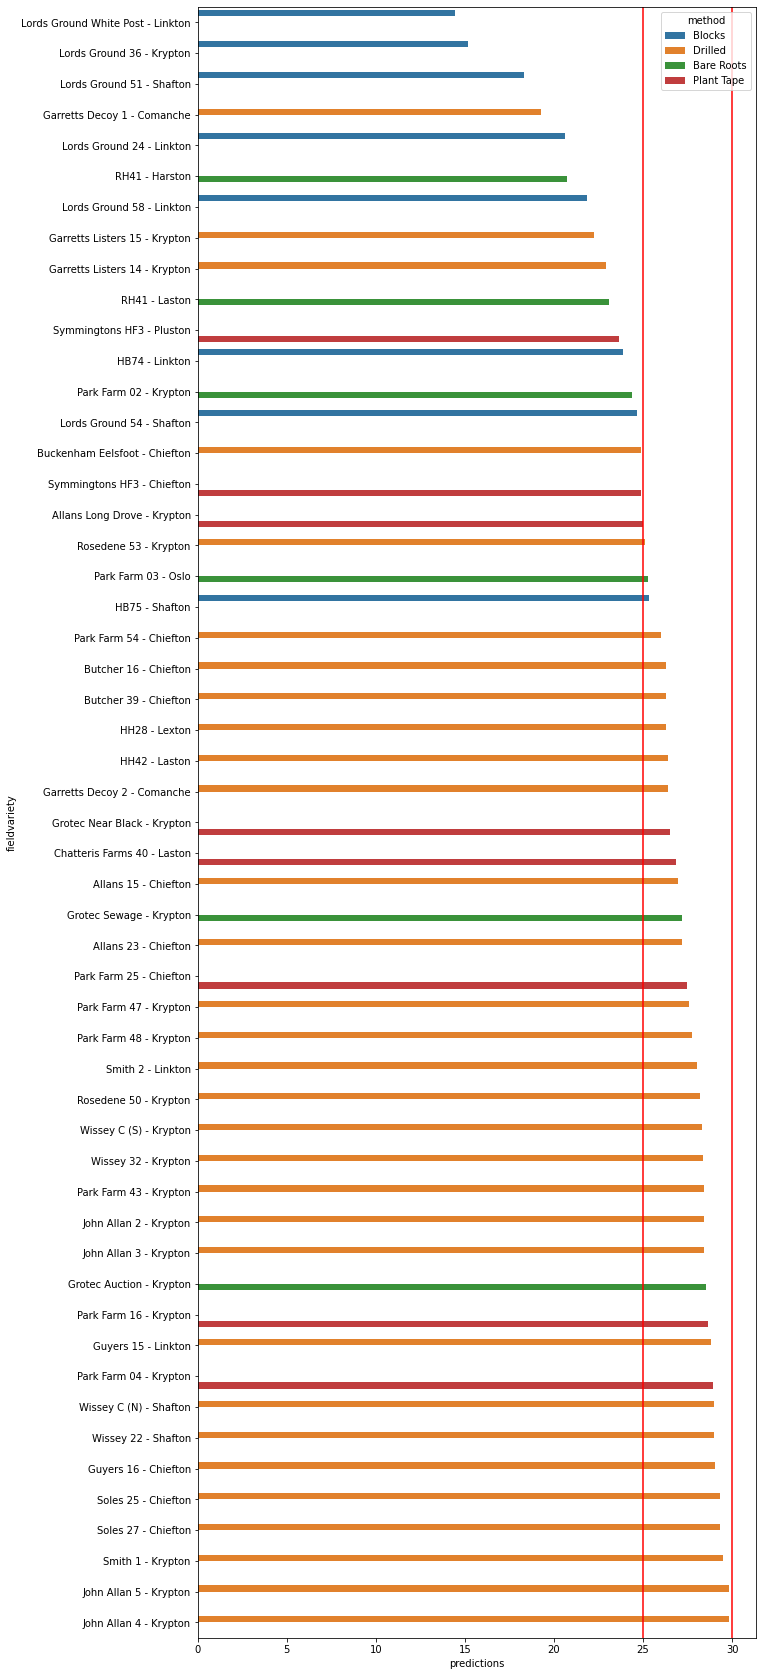

In [8]:
fig, ax = plt.subplots(figsize=(10, 30))
ax = sns.barplot(y='fieldvariety', x='predictions', data = planting_data[(planting_data.inputs == "Conventional")], hue = 'method', orient = "h")
plt.savefig('Conventional Predictions.png', dpi=300, bbox_inches = 'tight')
plt.axvline(x = 25, color = 'red')
plt.axvline(x = 30, color = 'red')
plt.show()

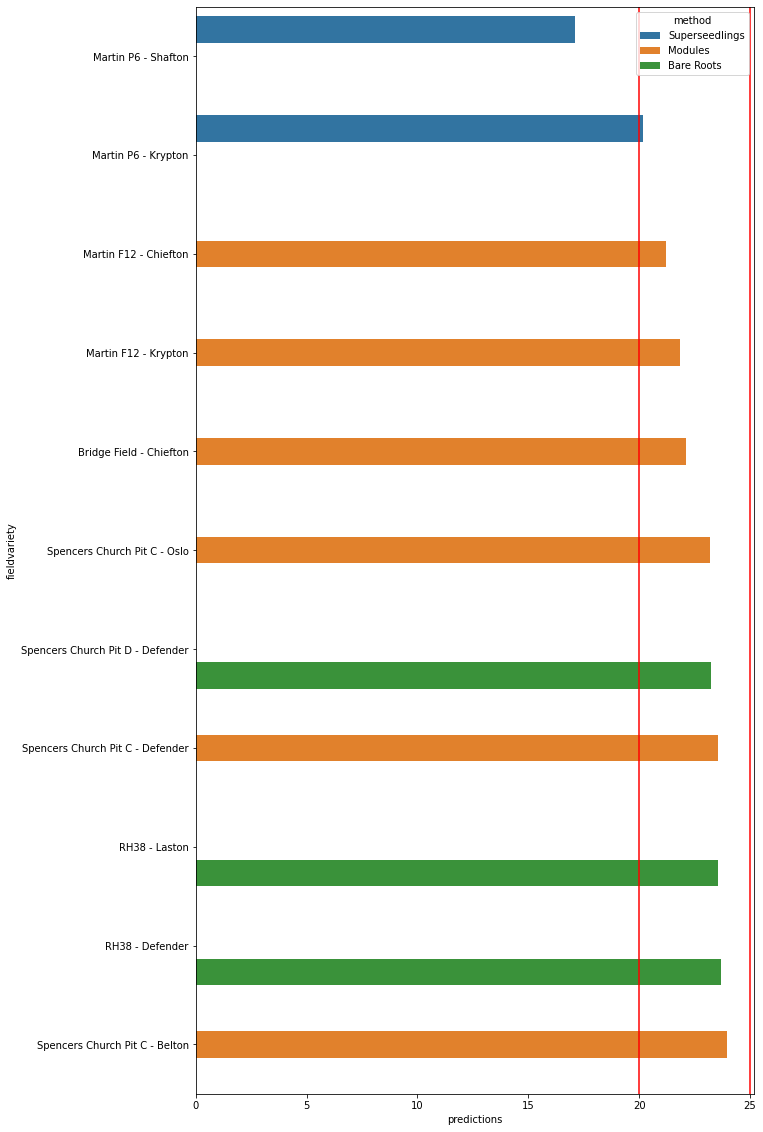

In [9]:
fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(y='fieldvariety', x='predictions', data = planting_data[(planting_data.inputs == "Organic")], hue = 'method', orient = "h")
plt.savefig('Organic Predictions.png', dpi=300, bbox_inches = 'tight')
plt.axvline(x = 20, color = 'red')
plt.axvline(x = 25, color = 'red')
plt.show()

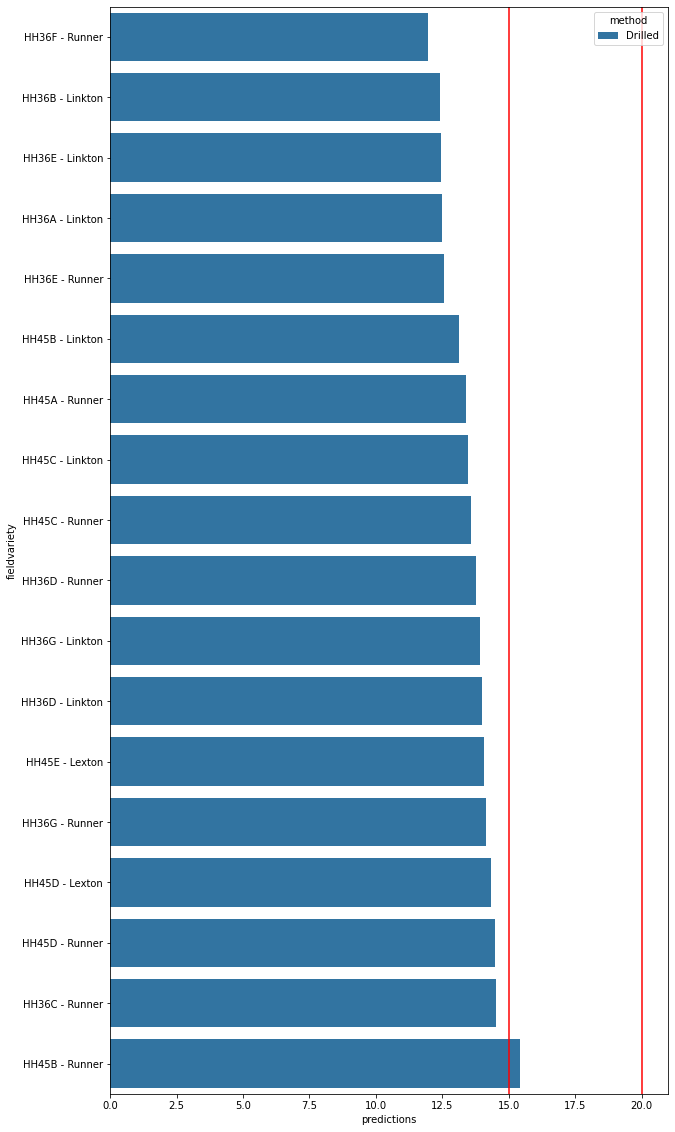

In [10]:
fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(y='fieldvariety', x='predictions', data = planting_data[(planting_data.inputs == "Baby")], hue = 'method', orient = "h")
plt.savefig('Baby Predictions.png', dpi=300, bbox_inches = 'tight')
plt.axvline(x = 15, color = 'red')
plt.axvline(x = 20, color = 'red')
plt.show()